Chapter 6: Decision Tree Exercises

1. What is the approximate depth of a decision tree trained (without) restriction on a training set with one million instances?

-> by default, max_depth = 'None'. However, Decision tres generally are approximately balanced, so traversing the decision tee requires going through roughly O(log$_{2}$(m)) nodes, where log$_{2}$(m) is the 'binary logarithm of 'm', equal to log(m) / log(2). 'm' is the number of instances in the dataset. For 1M instances, approximate depth is: log$_{2}$(1M) = 19.9 or depth of ~20.

page 202: To avoid overfitting the training data, you need to restruct the decision tree's feedom during training. As you know by now, this is called regularization. The regularization hyperparameters depend on the algoritym used, but generally you can at least restrict the maximum depth of the decision tree. In Scikit-Learn, this controlled by the 'max_depth' hyperparameter. The default value is 'None', which means unlimited. Reducing the 'max_depth' will regularize the model and thus reduce the risk of overfitting.

page 200 - 201: Making predictions requires traversing the decision from the root to a leaf. Decision tres generally are approximately balanced, so traversing the decision tee requires going through roughly O(log$_{2}$(m)) nodes, where log$_{2}$(m) is the 'binary logarith of 'm', equal to log(m) / log(2). Since each node only requires checking the value of one feature, the overal prediction complexity is O(log$_{2}$(m)), independent of the number of features. So predictions are very fast,, even when dealing with large training sets.

book answer: The depth of a well-balanced binary tree containing m leaves is equal to log₂(m), rounded up. log₂ is the binary log; log₂(m) = log(m) / log(2). A binary Decision Tree (one that makes only binary decisions, as is the case with all trees in Scikit-Learn) will end up more or less well balanced at the end of training, with one leaf per training instance if it is trained without restrictions. Thus, if the training set contains one million instances, the Decision Tree will have a depth of log₂(106) ≈ 20 (actually a bit more since the tree will generally not be perfectly well balanced).

2. Is a node's Gini impurity generally lower or higher that its parent's? Is it generally lower/higher, or always lower/higher?

-> The Gini impurity equation is: G$_{i}$ = 1 -   Σ(pi,k)**2  (where Σ is k=1 to k=n). A node's Gini impurity generally lower than its parent. . This is due to the CART training algorithm's cost function, which splits each node in a way that minimizes the weighted sum of its children's Gini impurities (see cost function below)

page 197: ... Finally, a node's 'gini' attribute measures its 'Gini impurity': a node is 'pure' (gini=0) if all training instances it applies to belong to the same class. For example, since the depth-1 lef node applies to the "Iris setosa" training instances, it is pure, and its 'Gini impurity' is 0. Equation 6-1 shows how the training algorithm computes the 'Gini impurity Gi of the ith node'. The depth-2 left node has a Gini impurty equal to 1 - (0/54)**2 - (49/54)**2 - (5/54)**2 ~= 0.168.

Equation 6-1 Gini impurity
G$_{i}$ = 1 -   Σ$_{k=1}^{n}$(p$_{i,k}$)$^{2}$  (where Σ is k=1 to k=n)

page 199 - 200: Scikit-Learn uses the 'Classification and Regression Tree (CART)' algorithm to train decision trees (also called 'growing trees'). The algorithm works by first splitting the training set into two subsets using a single feature 'k' and a threshold tk (e.g. "petal length =< 2.45cm"). How does it choose k and t$_{k}$? It searches for the pair (k,t$_{k}$) that produces the purest subsets, weighted by their size. Equation 6-2 gibves the cost function that the algorithm tries to minimize.

Equation 6-2 CART cost function for classification

J(k,t$_{k}$) = (m$_{left}$/m) * G$_{left}$ + (m$_{right}$/m) * G$_{right}$

  where: 
  G$_{left/right}$ measures the impurity of the left/right subset;
  m$_{left/right}$ is the number of instances in the left/right subset

Once the CART algorithm has successfully split the training set in two, it splitsthe subsets using the same logic, then the sub-subsets, and so on, recursively. It stops recursing once it reaches the maximum depth (defined by the max_depth hyperparameter) or it cannot find a split that will reduce impurity. ...


book answer: A node's Gini impurity is generally lower than its parent's. This is due to the CART training algorithm's cost function, which splits each node in a way that minimizes the weighted sum of its children's Gini impurities. However, it is possible for a node to have a higher Gini impurity than its parent, as long as this increase is more than compensated for by a decrease in the other child's impurity. For example, consider a node containing four instances of class A and one of class B. Its Gini impurity is 1 – (1/5)² – (4/5)² = 0.32. Now suppose the dataset is one-dimensional and the instances are lined up in the following order: A, B, A, A, A. You can verify that the algorithm will split this node after the second instance, producing one child node with instances A, B, and the other child node with instances A, A, A. The first child node's Gini impurity is 1 – (1/2)² – (1/2)² = 0.5, which is higher than its parent's. This is compensated for by the fact that the other node is pure, so its overall weighted Gini impurity is 2/5 × 0.5 + 3/5 × 0 = 0.2, which is lower than the parent's Gini impurity.

3. If a decision tree is overfitting the training set, is it a good idea to try decreasing max_depth?

-> Yes, reducing max_* hyperparameters such as max_depth regularize decision tree models (e.g. reduce overfitting) better.

page 202: [in addition to max_depth] The DecisionTreeClassifier class has a few other parameters that simularly restrict the shape of the decision tree:

    max_features: max number of features that are evaluation for splitting at each node

    max_leaf_nodes: maximum number of leaf nodes

    min_sample_split: Min number of samples a node must have before it can be split

    min_sample_leaf: Min number of samples a leaf node must have to be created

    min_weight_fraction_leaf: Same ans min_sample_leaf, but expressed as a fraction of the total number of weighted instances


Increasing min_* hyperparameters or reducing max_* hyperparameters will regularize the model

page 203: The unregularized model on the left [Figure 6-3] is clearly overfitting, and the regularized model [min_sample_leaf=5] on the right will probably generalize better.

book answer: If a Decision Tree is overfitting the training set, it may be a good idea to decrease max_depth, since this will constrain the model, regularizing it.

4. If a decision tree is underfitting the training set, is it a good idea to try scaling the input features?

-> No, decision trees don't require scaling. so scaling will be a waste of time.

page: 197: One of the many qualities of 'decision trees' is that the rquire very little data preparation. In fact, they don't require scaling or centering at all. 

book answer: Decision Trees don't care whether or not the training data is scaled or centered; that's one of the nice things about them. So if a Decision Tree underfits the training set, scaling the input features will just be a waste of time.

5. If it takes one hour to train a decision tree on a training set containing one million instances, roughly how much time will it take to train another decision tree on a training set containining ten million instances? Hint: consider the CART algorithm's computational complexity.

-> The CART algorithm's computational complexity is: O(n × m log₂(m)). If it takes 1 hour for 1M instances (m=1000000), then it for 10M instances (m=10000000), it will take (n * 10M * log$_{2}$(10M)) / (n * 1M * log$_{2}$(1M)) = (10 x 23.25) / 19.93  = 11.67 = X hours /  1 hour  -> X hours = 11.66  

page 200 - 201: Making predictions requires traversing the decision from the root to a leaf. Decision tres generally are approximately balanced, so traversing the decision tee requires going through roughly O(log$_{2}$(m)) nodes, where log(m) is the 'binary logarith of 'm', equal to log(m) / log(2). Since each node only requires checking the value of one feature, the overal prediction complexity is O(log(m)), independent of the number of features. So predictions are very fast,, even when dealing with large training sets.

page 201: The training algorithm compares all features (or less if max_features is set) on all samples at each node. Comparing all features on all samples ate ach node results in training complexity of O(n x m log$_{2}$(m)).

book anwser: The computational complexity of training a Decision Tree is O(n × m log₂(m)). So if you multiply the training set size by 10, the training time will be multiplied by K = (n × 10 m × log₂(10 m)) / (n × m × log₂(m)) = 10 × log₂(10 m) / log₂(m). If m = 10$^{6}$, then K ≈ 11.7, so you can expect the training time to be roughly 11.7 hours.

6. If it takes one hour to train a decision tree on a given training set, roughly how much time will it take if you double the number of features?

-> The CART algorithm's computational complexity is: O(n × m log₂(m)). Thus, if the number of features (n) doubles, the the training time will approximately double.

page 201: The training algorithm compares all features (or less if max_features is set) on all samples at each node. Comparing all features on all samples ate ach node results in training complexity of O(n x m log(m)).

book answer: If the number of features doubles, then the training time will also roughly double.

7. Train and fine-tune a deision tree for the 'moons' dataset by following these steps:

   a. Use 'make_moons (n_samples=10000, noise=0.4)'' to generate a moons dataset

   b. Use 'train_test_split()'' to split the datset into a training set and a test set.

   c. Uses grid search and cross-validation (with the help of the 'GridSearchCV' class) to find a good hyperparameter values for a DecisionTreeClassifer. Hint: try various values for max_leaf_nodes.

    d. Train it on the full training set using these hyperparamseters and measure your model's performance on the test set. You should get roughly 85% to 87% accuracy

7a. Use 'make_moons (n_samples=10000, noise=0.4)'' to generate a moons dataset

In [3]:
import sys
import sklearn
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [38]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=10000, noise=0.4, random_state=42)

 7b. Use 'train_test_split()'' to split the datset into a training set and a test set.

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)

7c. Uses grid search and cross-validation (with the help of the 'GridSearchCV' class) to find a good hyperparameter vlaues for a DecisionTreeClassifer. Hint: try various values for max_leaf_nodes.

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'max_leaf_nodes': list(range(2, 100)),
    'max_depth': list(range(1, 7)),
    'min_samples_split': [2, 3, 4]
}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=3)

grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

7d. Train it on the full training set using these hyperparamseters and measure your model's performance on the test set. You should get roughly 85% to 87% accuracy

In [41]:
grid_search_cv.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})>

In [42]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

By default, `GridSearchCV` trains the best model found on the whole training set (you can change this by setting `refit=False`), so we don't need to do it again. We can simply evaluate the model's accuracy:

In [43]:
from sklearn.metrics import accuracy_score
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)


0.8595

Extra steps to Visualize the results (I could not feed gridsearchCV results to graphviz)

In [44]:
# Create Decision Tree classifer object
tree_clf = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

# Train Decision Tree Classifer
tree_clf = tree_clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = tree_clf.predict(X_test)

In [45]:
accuracy_score(y_test, y_pred)

0.8595

In [46]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [47]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str(IMAGES_PATH / "moons_ex6_7.dot"),  # path differs in the book
        feature_names=["x1", "x2"],
        rounded=True,
        filled=True
    )

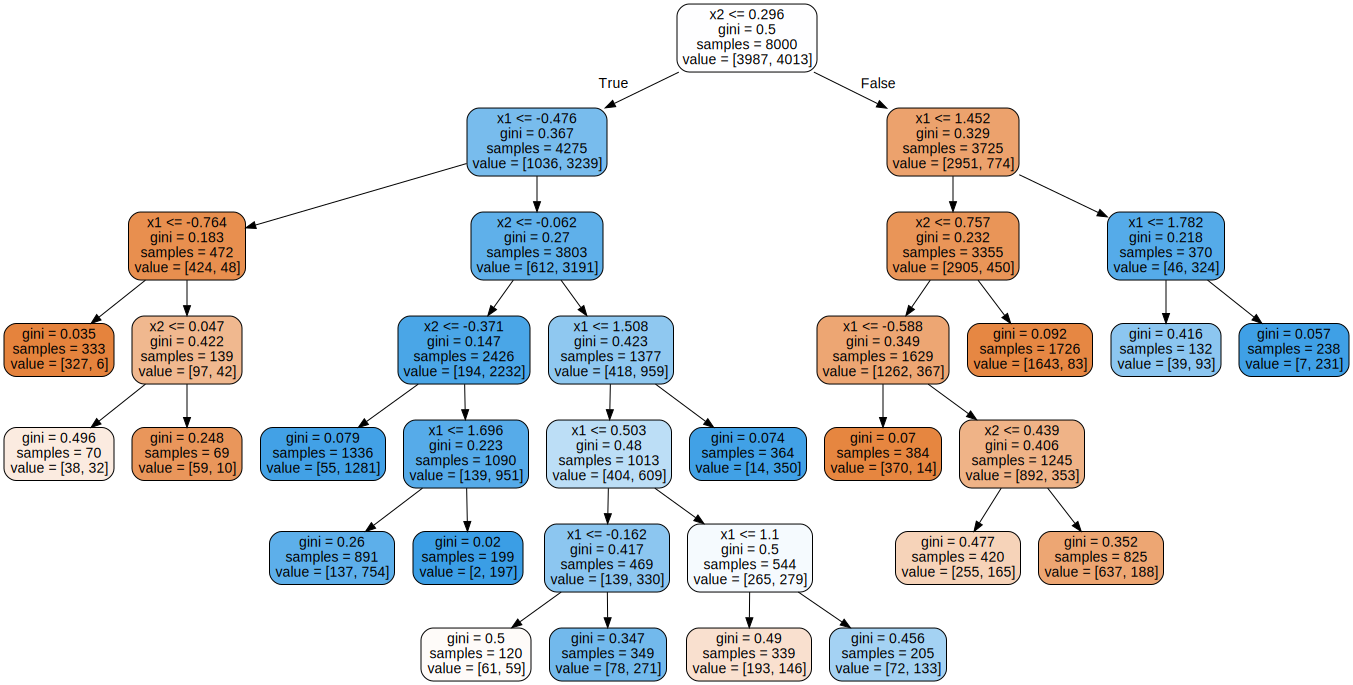

In [48]:
from graphviz import Source

Source.from_file(IMAGES_PATH / "moons_ex6_7.dot") 

In [49]:
# Create PNG file
!dot -Tpng {IMAGES_PATH / "moons_ex6_7.dot"} -o {IMAGES_PATH / "moons_ex6_7.png"}

8. Grow a forest by following these steps:

   a. Continuning the previous exercise generate 1000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit-Learn's ShuffleSplit class for this.

   b. Training one decision tree on each subset, using the best hyperparameter values found in the previous exercise. Evaluate these 1000 decision trees on the test set. Since they were trained on smaller sets, these decision trees will likely perform worse that the first decision tree, achieving only about 80% accuracy.

   c Now comes the magic. For each test set instance, generate the predictions of the 1000 decision trees, and keep only the most frequent prediction (you can use SciPy's 'mode()' function for this). This approach gives you 'majority-vote predictions' over the test set.

   d. Evaluate these predicitions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a random forest classifier!

8a. Continuning the previous exercise generate 1000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit-Learn's ShuffleSplit class for this.

In [56]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)

for mini_train_index, mini_test_index in rs.split(X_train):
    #print(f'mini_train_index: {mini_train_index}, length: {len(mini_train_index)}')
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

8b. Training one decision tree on each subset, using the best hyperparameter values found in the previous exercise. Evaluate these 1000 decision trees on the test set. Since they were trained on smaller sets, these decision trees will likely perform worse that the first decision tree, achieving only about 80% accuracy.

In [62]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)

    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.8056605

8c. Now comes the magic. For each test set instance, generate the predictions of the 1000 decision trees, and keep only the most frequent prediction (you can use SciPy's 'mode()' function for this). This approach gives you 'majority-vote predictions' over the test set.

In [65]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [66]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

8d. Evaluate these predicitions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a random forest classifier!

In [67]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.873

In [69]:
Y_pred.shape

(1000, 2000)

In [70]:
n_votes

array([949, 908, 963, ..., 918, 993, 615], dtype=int64)

In [72]:
y_pred_majority_votes.shape

(2000,)